In [20]:
import pandas as pd
import numpy as np
import glob
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

In [58]:
relative_path = 'Results/Separate_Runs/Cleaned/ARIMA_Catboost/*results365.csv'
file_list_results = glob.glob(relative_path)
result = pd.read_csv(file_list_results[0])

# Test CV score

In [59]:
result

,y_true0,Predictions_full0,Predictions_baseline0,Predictions_ARIMA0,CV_score_full0,CV_score_baseline0,CV_score_ARIMA0,y_true1,Predictions_full1,Predictions_baseline1,...,Error_ARIMA0,Error_full1,Error_baseline1,Error_ARIMA1,Error_full2,Error_baseline2,Error_ARIMA2,Error_full3,Error_baseline3,Error_ARIMA3
0,0.778,0.643037,0.857715,0.598872,0.134963,0.079715,0.179128,0.733,0.673852,0.857715,...,0.150618,0.155907,0.260612,0.167915,0.159799,0.260399,0.173217,0.170633,0.259741,0.183806
1,0.733,0.735239,0.857679,0.694071,0.002239,0.124679,0.038929,0.579,0.666553,0.857679,...,0.150618,0.155907,0.260612,0.167915,0.159799,0.260399,0.173217,0.170633,0.259741,0.183806
2,0.579,0.683965,0.857622,0.681652,0.104965,0.278622,0.102652,0.684,0.689505,0.857622,...,0.150618,0.155907,0.260612,0.167915,0.159799,0.260399,0.173217,0.170633,0.259741,0.183806
3,0.684,0.656149,0.857495,0.637556,0.027851,0.173495,0.046444,0.474,0.639050,0.857495,...,0.150618,0.155907,0.260612,0.167915,0.159799,0.260399,0.173217,0.170633,0.259741,0.183806
4,0.474,0.653978,0.857416,0.670055,0.179978,0.383416,0.196055,0.105,0.688666,0.857416,...,0.150618,0.155907,0.260612,0.167915,0.159799,0.260399,0.173217,0.170633,0.259741,0.183806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,0.778,0.799681,0.822425,0.746921,0.021681,0.044425,0.031079,0.889,0.805685,0.822425,...,0.150618,0.155907,0.260612,0.167915,0.159799,0.260399,0.173217,0.170633,0.259741,0.183806
358,0.889,0.818234,0.822408,0.759711,0.070766,0.066592,0.129289,0.941,0.808169,0.822408,...,0.150618,0.155907,0.260612,0.167915,0.159799,0.260399,0.173217,0.170633,0.259741,0.183806
359,0.941,0.866361,0.822434,0.808163,0.074639,0.118566,0.132837,0.895,0.826292,0.822434,...,0.150618,0.155907,0.260612,0.167915,0.159799,0.260399,0.173217,0.170633,0.259741,0.183806
360,0.895,0.883858,0.822480,0.844013,0.011142,0.072520,0.050987,0.895,0.840723,0.822480,...,0.150618,0.155907,0.260612,0.167915,0.159799,0.260399,0.173217,0.170633,0.259741,0.183806


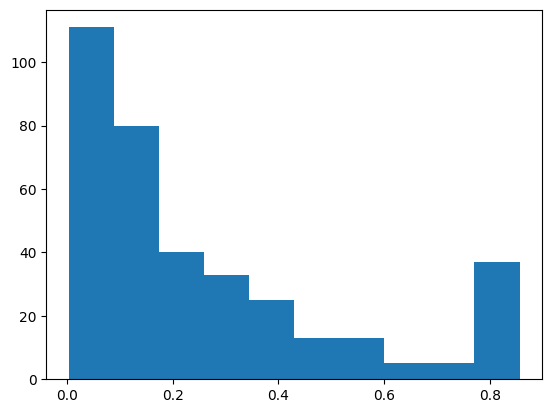

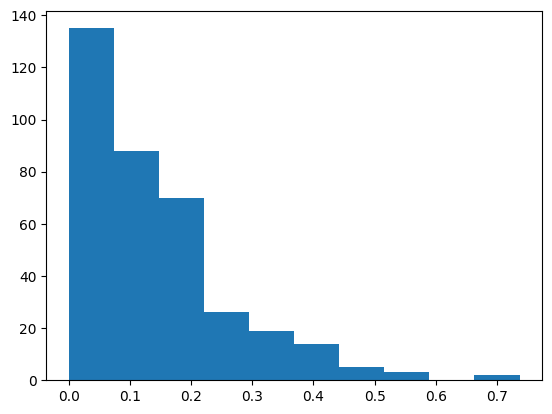

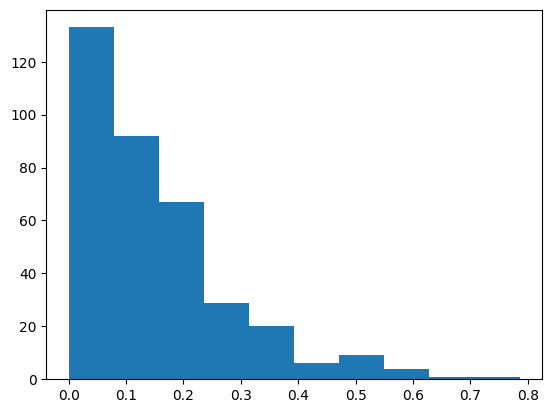

In [61]:
# Not normal distribution -> not paired t-test -> wilcoxon test
plt.hist(result['CV_score_baseline0'])
plt.show()
plt.hist(result['CV_score_full0'])
plt.show()
plt.hist(result['CV_score_ARIMA0'])
plt.show()

In [62]:
cv_score_full_columns = ['CV_score_full{}'.format(j) for j in range(3+1)]
cv_score_full_columns
comparisons = [(cv_score_full_columns[j], cv_score_full_columns[k]) for j in range(len(cv_score_full_columns)) for k in range(j + 1, len(cv_score_full_columns))]
comparisons

[('CV_score_full0', 'CV_score_full1'),
 ('CV_score_full0', 'CV_score_full2'),
 ('CV_score_full0', 'CV_score_full3'),
 ('CV_score_full1', 'CV_score_full2'),
 ('CV_score_full1', 'CV_score_full3'),
 ('CV_score_full2', 'CV_score_full3')]

In [66]:
import numpy as np
from scipy.stats import wilcoxon
specific_model = ''
# Assuming 'result' is your DataFrame containing the data
# Loop through each 'i' and compare errors for baseline, ARIMA, and full model
i=0
model_columns = [col.split('_')[-1] for col in result.columns if col.startswith('CV_score_') and col.endswith(str(i))]
print(model_columns)
if specific_model:
    print(f'Specific model Comparison: {specific_model}')
    model_columns = ['{}{}'.format(specific_model, j) for j in range(3+1)]


comparisons = [(model_columns[j], model_columns[k]) for j in range(len(model_columns)) for k in range(j + 1, len(model_columns))]
print(comparisons)


print("For prediction {} days into the future:".format(i+1))

for (model_name1, model_name2) in comparisons:
    differences = np.array(result['CV_score_{}'.format(model_name1)] - result['CV_score_{}'.format(model_name2)])
    rounded_differences = np.round(differences, decimals=5)

    # Perform Wilcoxon signed-rank tests
    statistic, p_value = wilcoxon(rounded_differences)
    
    print("Wilcoxon statistic ({} vs. {}):".format(model_name1, model_name2), statistic)
    print("p-value ({} vs. {}):".format(model_name1, model_name2), p_value)

print('----------')


['full0', 'baseline0', 'ARIMA0']
[('full0', 'baseline0'), ('full0', 'ARIMA0'), ('baseline0', 'ARIMA0')]
For prediction 1 days into the future:
Wilcoxon statistic (full0 vs. baseline0): 17722.0
p-value (full0 vs. baseline0): 3.1089044606498994e-14
Wilcoxon statistic (full0 vs. ARIMA0): 23909.5
p-value (full0 vs. ARIMA0): 1.0076522590247155e-05
Wilcoxon statistic (baseline0 vs. ARIMA0): 19174.0
p-value (baseline0 vs. ARIMA0): 6.652638898473572e-12
----------


# Test Error across

# Mindst lige så simpelt blot route_station i col og error i den næste. Tjek dette mod en anden model aka instance of error class!